In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mplppt

(0, 5)

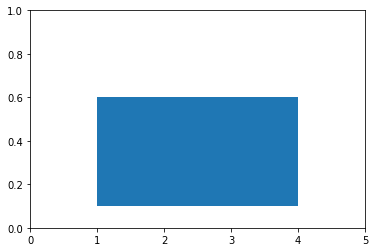

In [2]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
#plt.axis('equal')

ax1.add_patch(
  patches.Rectangle(
  (1, 0.1),   # (x,y)
  3,          # width
  0.5,          # height
  )
)

plt.xlim(0,5)

In [3]:
rects = plt.findobj(fig1, patches.Rectangle)[:-1]
print(rects)
ppt = mplppt.ppt.PPT(objects=[])
for rect in rects:
  rect._axes = ax1
  ppt = ppt + mplppt.ppt.Rectangle.from_mpl(rect)
ppt.save('test.pptx')

[<matplotlib.patches.Rectangle object at 0x000002B6C4963320>, <matplotlib.patches.Rectangle object at 0x000002B6C59CF320>]
<!-- Start Rect [1pt=12700] insert after </p:grpSpPr> -->
<p:sp>
    <p:nvSpPr>
        <p:cNvPr id="1" name=""/>
        <p:cNvSpPr/>
        <p:nvPr/>
    </p:nvSpPr>
    <p:spPr>
        <a:xfrm>
            <a:off x="1" y="1"/>
            <a:ext cx="1097280" cy="3657600"/>
        </a:xfrm>
        <a:prstGeom prst="rect">
            <a:avLst/>
        </a:prstGeom>
        <a:noFill/>
        <a:ln w="0">
            <a:noFill/>
        </a:ln>
    </p:spPr>
</p:sp>
<!-- End Rect [1pt=12700] -->
<!-- Start Rect [1pt=12700] insert after </p:grpSpPr> -->
<p:sp>
    <p:nvSpPr>
        <p:cNvPr id="1" name=""/>
        <p:cNvSpPr/>
        <p:nvPr/>
    </p:nvSpPr>
    <p:spPr>
        <a:xfrm>
            <a:off x="1097281" y="1463041"/>
            <a:ext cx="3291840" cy="1828800"/>
        </a:xfrm>
        <a:prstGeom prst="rect">
            <a:avLst/>
    

In [4]:
plt.rcParams['figure.figsize']

[6.0, 4.0]

In [5]:
4*mplppt.utils.PIXELSPERINCH//mplppt.utils.PIXELSPERPOINT

288

In [6]:
rect._axes.get_ylim()

(0.0, 1.0)

In [7]:
rect._axes

In [8]:
rect._axes.figure.get_figheight()

4.0

In [9]:
rect._axes.figure.get_figwidth()

6.0

In [10]:
fig1._gid